In [1]:
# A primeira coisa que temos que fazer é importar os pacotes que iremos utilizar.
# Obs.: Pacotes do Python são conjuntos de funcionalidades disponíveis da ferramenta.

#Pandas: Possui inúmeras funções e comandos para importar arquivos, analisar dados, tratar dados, etc.
import pandas as pd

#Matplotlib: Possui uma série de funções e comandos para exibição de gráficos
import matplotlib.pyplot as plt

#Seaborn: Possui uma série de funções e comandos para exibição de gráficos (Visualizações mais robustas do que o Matplotlib)
import seaborn as sns

#Numpy: Possui uma série de funções e comandos para trabalharmos com números de forma em geral(formatação, calculos, etc)
import numpy as np

#Warnings: Possui detalhes sobre os avisos e alertas que aparecem, porém podemos utiliza-lo também para que os alertas de
#futuras atualizações e metodos depreciados não sejam exibidos
import warnings
warnings.filterwarnings("ignore") 

# Locale: Utilizado para formatação de datas, valores, dias de acordo com a região que queremos.
import locale

In [2]:
#Comando para exibir todas colunas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
#Comando utilizado para carregar o arquivo e armazena-lo como um DataFrame do Pandas
#Um DataFrame do Pandas é como se fosse uma planilha do Excel, onde podemos tratar linhas e colunas.
df_dados = pd.read_excel("dados.xlsx")

In [4]:
#Comando utilizado para verificar a quantidade de linhas e colunas do arquivo
#Colunas também são chamadas de variáveis.
df_dados.shape

(21240, 4)

In [5]:
#Comando utilizado para verificar as linhas iniciais do DataFrame
df_dados.head()

,Itens,Quantidade,VALOR,DATA_VENDA
0,Delícia de Minas P,7,6.40,2023-01-31
1,Delícia de Minas P,10,9.14,2023-02-19
2,Delícia de Minas P,9,8.23,2023-01-27
3,Delícia de Minas P,7,6.40,2023-03-15
4,Delícia de Minas P,7,6.40,2023-02-17


In [6]:
#Comando utilizado para verificar as linhas finais do DataFrame
df_dados.tail()

,Itens,Quantidade,VALOR,DATA_VENDA
21235,Folhado calabresa P,10,9.14,2023-02-22
21236,Folhado calabresa P,1,0.91,2023-02-08
21237,Folhado calabresa P,2,1.83,2023-03-25
21238,Folhado calabresa P,8,7.32,2023-03-19
21239,Folhado calabresa P,10,9.14,2023-03-28


In [7]:
#Avaliar o período dos dados coletados
inicio = pd.to_datetime(df_dados['DATA_VENDA']).dt.date.min()
fim = pd.to_datetime(df_dados['DATA_VENDA']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2023-01-01 Até: 2023-04-01


In [8]:
#Comando utilizado para verificar informações sobre os dados(Tipo de variáveis, Variáveis, Quantidade de registros, etc)

#Neste caso a variavel DATA_VENDA deve ser do tipo Date e a variavel VALOR do tipo Float. Precisamos tratar essas variáveis.

df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21240 entries, 0 to 21239
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Itens       21240 non-null  object        
 1   Quantidade  21240 non-null  int64         
 2   VALOR       21240 non-null  float64       
 3   DATA_VENDA  21240 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 663.9+ KB


In [9]:
# Dessa forma podemos agrupar os valores e identificar se há algum valor discrepante.
# Observe que há um valor que foi inserido como "SEM VALOR"
df_dados.groupby(['VALOR']).size()

VALOR
0.91    2119
1.83    2134
2.74    2113
3.66    2051
4.57    2107
5.49    2096
6.40    2116
7.32    2151
8.23    2163
9.14    2190
dtype: int64

In [10]:
# Aqui poderíamos resolver de duas formas.

# A primeira forma seria excluir todo o registro, mas estariamos perdendo dados.
# df_dados.drop(df_dados.loc[df_dados['VALOR']=='SEM VALOR'].index, inplace=True)


# A segunda forma seria verificar o valor médio ou da mediana deste modelo e substituir a palavra SEM VALOR para um valor médio.
# df_dados.loc[df_dados['VALOR'] == 'SEM VALOR']

# O codigo acima é para o caso de termos registros sem valores.


In [11]:
# Agora substituimos a palavra SEM VALOR pelo valor ZERO
# df_dados.loc[(df_dados['VALOR'] == 'SEM VALOR'), 'VALOR'] = 0

In [12]:
# Em seguida convertemos o campo em float
# df_dados['VALOR'] = df_dados['VALOR'].astype(np.float64)

In [13]:
# Verificamos os valores medianos da coluna modelo para substituir o valor ZERO
# df_dados.loc[df_dados['MODELO'] == 'PASSAT'].median()

In [14]:
# Aqui atualizamos o valor conforme a mediana daquele modelo
# df_dados.loc[(df_dados['VALOR'] == 200000), 'VALOR'] = 0

In [15]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamado de valores missing ou NAN (Not Available)
df_dados.isnull().sum()

Itens         0
Quantidade    0
VALOR         0
DATA_VENDA    0
dtype: int64

In [16]:
# Agora iremos tratar os valores missing, ou seja, os registros que não possuem valores.
# Uma forma bem mais simples de tratarmos o dado é utilizar direto a função FILLNA preenchendo os valores em branco 
# com a mediana
# df_dados['KM-LITRO'] = df_dados['KM-LITRO'].fillna((df_dados['KM-LITRO'].median()))

In [17]:
# Observe agora que não temos mais nenhum valor em branco
# df_dados.isnull().sum()

In [18]:
# Agora iremos avaliar os outliers das colunas que são númericas
# OUTLIERS são valores discrepantes que estão bem acima ou bem abaixo dos outros valores

# Vamos carregar em uma lista as variaveis que são do tipo INT64 E FLOAT64
variaveis_numericas = []
for i in df_dados.columns[0:48].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_numericas.append(i)

Quantidade : int64
VALOR : float64


In [19]:
# Vamos observar a lista de variáveis e avaliar se nestas variáveis temos outliers através de um boxplot
variaveis_numericas

['Quantidade', 'VALOR']

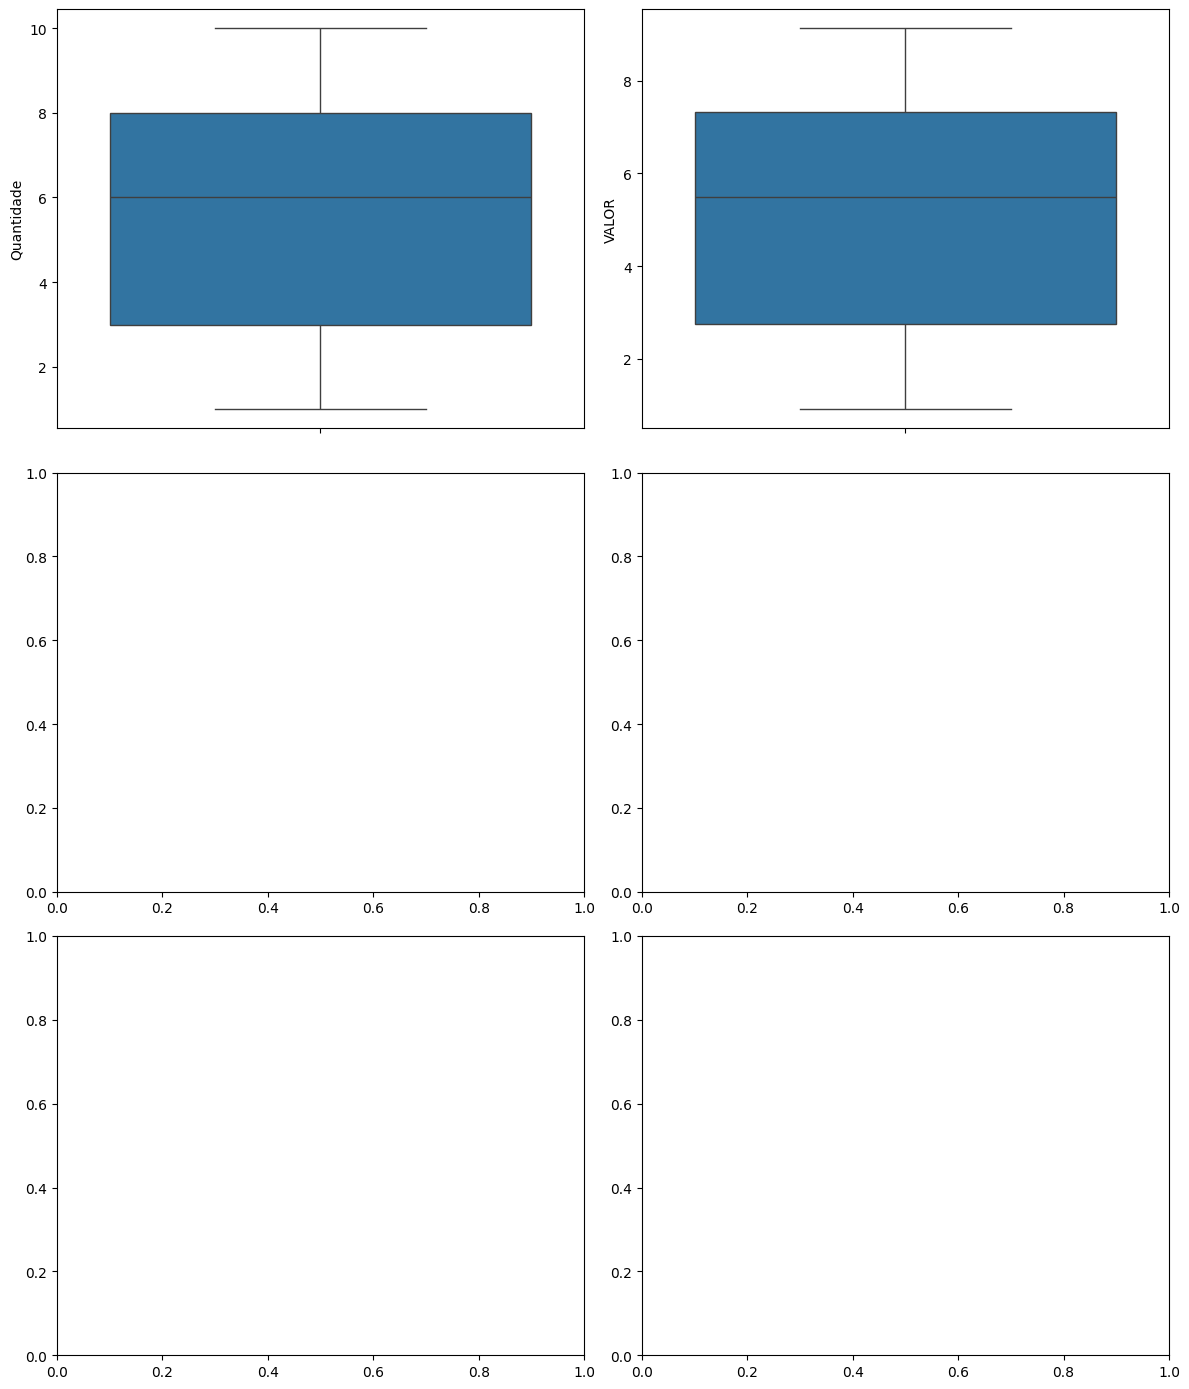

In [20]:
# Com este comando iremos exibir todos gráficos de todas colunas de uma vez só para facilitar nossa analise.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [12.00, 14.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(3, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()


# Boxplots
# Boxplot é utilizado para avaliar e comparar o formato, tendência central e variabilidade de distribuições de amostra, 
# e para procurar por outliers. Por padrão, um boxplot demonstra a mediana, os quartis, 
# o intervalo interquartil(IQR) e outliers para cada variável. 

# Outlier são valores que estão bem discrepantes dentro do conjunto de dados, podem ser para mais ou para menos. 
# Observe nos DOIS ULTIMOS boxplot que há os pontinhos acima das linhas. Esses valores são outliers

In [21]:
# Agora já sabemos que temos OUTLIERS nas variáveis CAVALOS e VALOR. Vamos olhar quais são esses outliers para avaliar
# como iremos trata-los.

# Como no boxplot acima mostra que o maior número de cavalos está em torno de 700, então iremos listar os casos acima de 700
# Observe que após listarmos só temos um registro com OUTLIER.

# df_dados.loc[df_dados['CAVALOS'] > 700]

In [22]:
# Nesse exemplo vamos excluir o registro todo.
# df_dados.drop(df_dados.loc[df_dados['CAVALOS'] == 1800].index, inplace=True)

In [23]:
# Agora para a variavel VALOR vamos listar os valores maiores que 900.000
# Observe que temos dois registros considerados outlier, ou seja, o valor está muito acima do normal.

# Neste caso vamos substituir os valores pelo valor médio do modelo LAMBORGUINI.

# df_dados.loc[df_dados['VALOR'] > 900000]

In [24]:
# Vamos identificar o valor mediana do modelo LAMBORGUINI

# df_dados.loc[df_dados['MODELO'] == 'LABORGUINI'].median()

In [25]:
# Aqui atualizamos o valor conforme a mediana daquele modelo
# df_dados.loc[(df_dados['VALOR'] > 900000), 'VALOR'] = 900000

In [26]:
# Vamos avaliar novamente os boxplot e verificar se ficou algum OUTLIER
# Observe que na coluna cavalos de potencia ainda possuem alguns OUTLIERS porém nesse caso, olhando para o modelos dos carros
# podemos observar que realmente é a potencia deles. Nesse caso podemos mante-los.

# Aqui definimos o tamanho da tela para exibição dos gráficos
# plt.rcParams["figure.figsize"] = [12.00, 14.00]
# plt.rcParams["figure.autolayout"] = True

# # Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
# f, axes = plt.subplots(3, 2) #3 linhas e 2 colunas

# linha = 0
# coluna = 0

# for i in variaveis_numericas:
#     sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
#     coluna += 1
#     if coluna == 2:
#         linha += 1
#         coluna = 0            

# plt.show()

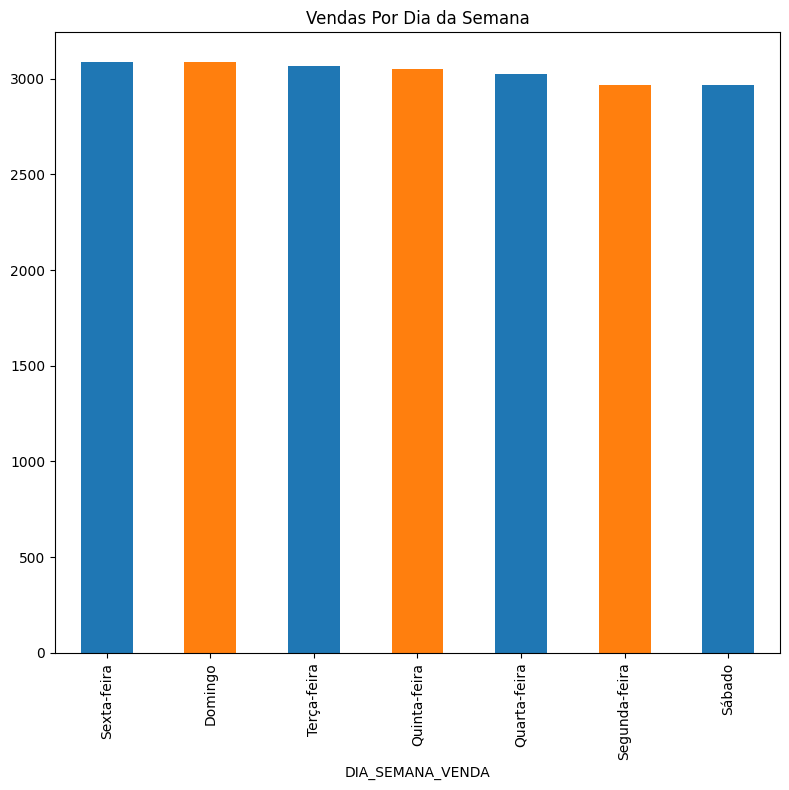

In [27]:
# Agora vamos tratar a variavel DATA_VENDA
# Aqui iremos fazer um tratamento para transformar o campo para o tipo DATE e também incluirmos novas variáveis a partir da data
# Vamos incluir as variaveis separadas, ANO, MES e DIA
# Vamos também incluir a variavel DIA_SEMANA e avaliarmos qual dia da semana temos mais vendas.

locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

df_dados['DATA_VENDA'] =  pd.to_datetime(df_dados['DATA_VENDA'], format='%d/%m/%Y')
df_dados['DATA_VENDA'] = df_dados['DATA_VENDA'].dt.date
df_dados['ANO_VENDA'] = pd.DatetimeIndex(df_dados['DATA_VENDA']).year
df_dados['MES_VENDA'] = pd.DatetimeIndex(df_dados['DATA_VENDA']).month
df_dados['DIA_VENDA'] = pd.DatetimeIndex(df_dados['DATA_VENDA']).day
df_dados['DIA_SEMANA_VENDA'] = pd.DatetimeIndex(df_dados['DATA_VENDA']).day_name(locale = 'pt_BR.utf8')


plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
df_dados.DIA_SEMANA_VENDA.value_counts().plot(kind='bar', title='Vendas Por Dia da Semana',color = ['#1F77B4', '#FF7F0E']);

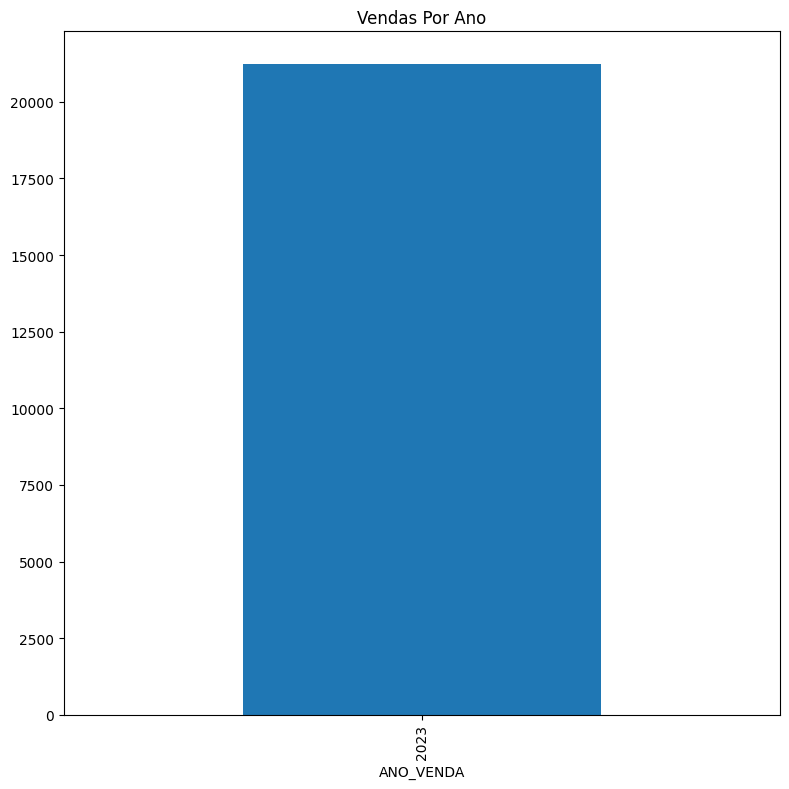

In [28]:
# Também podemos observar as vendas por ano
df_dados.ANO_VENDA.value_counts().plot(kind='bar', title='Vendas Por Ano',color = ['#1F77B4', '#FF7F0E']);

In [30]:
# Agora vou importar uma imagem para explicar o tratamento que iremos fazer das variaveis Dummys/One Hot Encoding
# from IPython.display import Image
# Image('exemplo.png')

In [31]:
# Antes de gerar as variaveis dummys/one hot encoding vamos excluir as variaveis que não precisaremos mais.
# Neste caso vamos excluir a variavel DATA_VENDA, pois já geramos as variaveis separadas de ANO, MES e DIA
df_dados.drop('DATA_VENDA', axis=1, inplace=True)

In [32]:
# Convert os campos categoricos para ONE HOT ENCODING
# A imagem abaixo explica de forma simples esse tratamento

df_dados = pd.get_dummies(df_dados)

In [33]:
df_dados.head()

,Quantidade,VALOR,ANO_VENDA,MES_VENDA,DIA_VENDA,Itens_Abacaxi,Itens_Abacaxi FRUTA,Itens_Abacaxi c/ hortelã,Itens_Abacaxi c/ hortelã FRUTA,Itens_Bacon,Itens_Banana e Canela P,Itens_Beijinho,Itens_Biscoito Trançado,Itens_Biscoito de Queijo,Itens_Biscoito de queijo,Itens_Biscoito trançado,Itens_Bolinha de queijo p,Itens_Bolo Banana Pedaço,Itens_Bolo Cenoura c/ Chocolate P,Itens_Bolo cenoura c/ chocolate pote,Itens_Bolo cenoura com chocolate G,Itens_Bolo de banana,Itens_Bolo de banana P,Itens_Bolo de chocolate,Itens_Bolo de chocolate P,Itens_Bolo de laranja,Itens_Bolo de mandioca,Itens_Bolo de mesclado,Itens_Bolo de milho,"Itens_Bolo laranja, fubá e canela G","Itens_Bolo laranja, fubá e canela P",Itens_Bolo no Pote,Itens_Brigadeiro,Itens_Brigadeiro Copo,Itens_Café G,Itens_Café P,Itens_Caju,Itens_Calabresa,Itens_Calzone português,Itens_Cappuccino gelado G,Itens_Cappuccino gelado P,Itens_Cappuccino quente G,Itens_Cappuccino quente P,Itens_Casadinho,Itens_Casadinho de Goiaba,Itens_Cento de salgado,Itens_Cento de salgado especial,Itens_Cento doces,Itens_Cestinha Morango,Itens_Chocolate quente G,Itens_Chocolate quente P,Itens_Chá gelado,Itens_Coca 600ml,Itens_Coca Zero 600 ml,Itens_Coca ks,Itens_Coca ks zero,Itens_Coca lata,Itens_Coca lata zero,Itens_Copo da Felicidade de morango p,Itens_Copo da felicidade de morango,Itens_Copo da felicidade de uva,Itens_Coxinha G,Itens_Coxinha P,Itens_Creme Cupuacu,Itens_Creme Maracujá,Itens_Creme Morango,Itens_Croissant Chocolate,Itens_Croissant Creme,Itens_Croissant Frango c/ Catupiry,Itens_Croissant Peito de Peru,Itens_Cupuaçu,Itens_Cuscuz Infantil,Itens_Cuscuz c/ manteiga,"Itens_Cuscuz, queijo e carne","Itens_Cuscuz, queijo e frango","Itens_Cuscuz, queijo e presunto",Itens_Del Valle,Itens_Delicia de minas,Itens_Delícia de Minas G,Itens_Delícia de Minas P,Itens_Docinho de leite ninho,Itens_Empada Alho Poró G,Itens_Empada Carne de Sol,Itens_Empada Frango G,Itens_Empada Frango P,Itens_Empada Pernil G,Itens_Empada de camarão,Itens_Empadão de pernil,Itens_Enroladinho Goiano,Itens_Enroladinho de Queijo G,Itens_Enroladinho de Queijo P,Itens_Enroladinho de Salsicha G,Itens_Enroladinho de Salsicha P,Itens_Esfirra Carne G,Itens_Esfirra Carne P,Itens_FOLHADO Banana c/ canela,Itens_FOLHADO Fio de ovos c/ bacon,Itens_FOLHADO Frango,Itens_FOLHADO Goiabada,Itens_FOLHADO Presunto e queijo,Itens_Fanta Laranja,Itens_Fatia bolo caseiro,Itens_Folhado Calabresa,Itens_Folhado Romeu & Julieta G,Itens_Folhado calabresa P,Itens_Fubá mix G,Itens_Ganache,Itens_Goiaba FRUTA,Itens_Gravatinha,Itens_Guaraná 600 ml,Itens_Guaraná Zero,Itens_Guaraná Zero 600 ml,Itens_Guaraná ks,Itens_Guaraná lata,Itens_H2OH!,Itens_JARRA Abacaxi FRUTA,Itens_JARRA Abacaxi c/ hortelã FRUTA,Itens_JARRA Caju,Itens_JARRA Laranja FRUTA,Itens_JARRA Limão FRUTA,Itens_JARRA Maracujá,Itens_JARRA Maracujá FRUTA,Itens_JARRA Morango,Itens_JARRA Morango FRUTA,Itens_Jarra goiaba,Itens_Joelho G,Itens_Joelho P,Itens_Kibe G,Itens_Kibe P,Itens_LARANJU,Itens_Laranja FRUTA,Itens_Leite quente P,Itens_Limoneto,Itens_Limão FRUTA,Itens_MEIO CENTO DE SALGADO,Itens_MORANJA,Itens_Maracujá,Itens_Maracujá FRUTA,Itens_Mil Folhas Doce,Itens_Milho c/ Mostarda e mel,Itens_Morango,Itens_Morango FRUTA,Itens_Mousse Limão e Ganache,Itens_Mousse Maracujá G,Itens_Mousse Maracujá e Chocolate,Itens_Mousse de Maracujá,Itens_Mousse de limão,Itens_Mousse de limão G,Itens_Nescau G,Itens_Nescau P,Itens_Nevada,Itens_Nhoque gaúcho pote,Itens_Palmier,Itens_Palmier M,Itens_Pastel P,Itens_Paulista G,Itens_Paulista P,Itens_Pavê,Itens_Peps Twist,Itens_Pepsi Black,Itens_Pingado G,Itens_Pingado P,Itens_Pote Pimentinha,Itens_PÃO DE BATATA BAROA,Itens_Pão 3 queijos G,Itens_Pão Pizza G,Itens_Pão Pizza P,Itens_Pão c/ manteiga,"Itens_Pão c/ ovo, queijo e presunto",Itens_Pão c/ queijo e presunto,Itens_Pão da Vovó G,Itens_Pão da Vovó P,Itens_Pão de Queijo G,Itens_Pão de batata,Itens_Pão de mel,Itens_Pão de queijo P,Itens_Queijo e Coco,Itens_Queijo e Presunto G,Itens_Queijo e Presunto P,Itens_Quiche Alho Poró,I

In [34]:
# Pronto, agora já temos nosso conjunto de dados tratados.
# Vamos salvar esse conjunto de dados com todos tratamentos.
df_dados.to_excel('dados_com_tratamento.xlsx', index = False)